

# Project : Movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

In this project I will analyze movie data, and answer some questions like what is the gain for each type of movie and what are the most popular and least popular movies and what is the average of profit 


In [1]:
# import statements for all of the packages that I need

#import pandas librery 
import pandas as pd

#import numpy librery 
import numpy as np

#import matplotlib librery 
import matplotlib.pyplot as plt

#import seaborn librery 
import seaborn as sns




## Data Wrangling



In [2]:
#read csv file 
df = pd.read_csv('tm.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# cleaning steps

- Checking dublications or not 
- removing null values
- checking datatype of columns
- checking messy data 
- checking quality and assessing issues
- check if the cell has only one value

In [3]:
# using this statment to see sum of duplicates
df.duplicated().sum()

1

In [4]:
# by df.duplicate i can see rows that duplicates 
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [5]:
# Drop duplicates to remove rows that duplicate
df.drop_duplicates(inplace=True)
# shape for columns number and rows number 
df.shape

(10865, 21)

In [6]:
# using info to know how many nulls for each columns ?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [7]:
# Drop some columns that are empty using df.drop
df.drop(['imdb_id','tagline','homepage','overview'],axis=1,inplace= True)

In [8]:
# split cast column into 5 columns
df[["Actor1","Actor2","Actor3","Actor4","Actor5"]] = df.cast.str.split('|',expand=True)

In [9]:
# show table by df.head
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,Actor1,Actor2,Actor3,Actor4,Actor5
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [10]:
# create column and change the data type for Release data column
df["Release date"] = pd.to_datetime(df["release_date"])

# Exploratory Data Analysis

- How much profit per movie ?
- How much is the most popular?
- How much is the least popular?
- what is the average profit ?
- How much is the most budget?


# Question 1

In [11]:
# Create the column that calculates the profit 
df["Maxab"] = df["revenue"]-df["budget"]

In [12]:
# show table by df.head
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,release_year,budget_adj,revenue_adj,Actor1,Actor2,Actor3,Actor4,Actor5,Release date,Maxab
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,...,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,2015-06-09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,...,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,2015-05-13,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,...,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,2015-03-18,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,...,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,2015-12-15,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,...,2015,1.747999e+08,1.385749e+09,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,2015-04-01,1316249360


# Question 2

In [13]:
# using max to see the biggest number
df.popularity.max()

32.985763

# Question 3

In [14]:
# using min to see the smallest  number
df.popularity.min()

6.5e-05

# Question 4

In [15]:
# in the 'maksab 'column i can calculate the average profit by .mean 
df2 = df["Maxab"].mean()
print (df2)

25202610.01251726


# Question 5

In [16]:
# using max to see the biggest number of budget
df.budget.max()

425000000

# Visualization Data

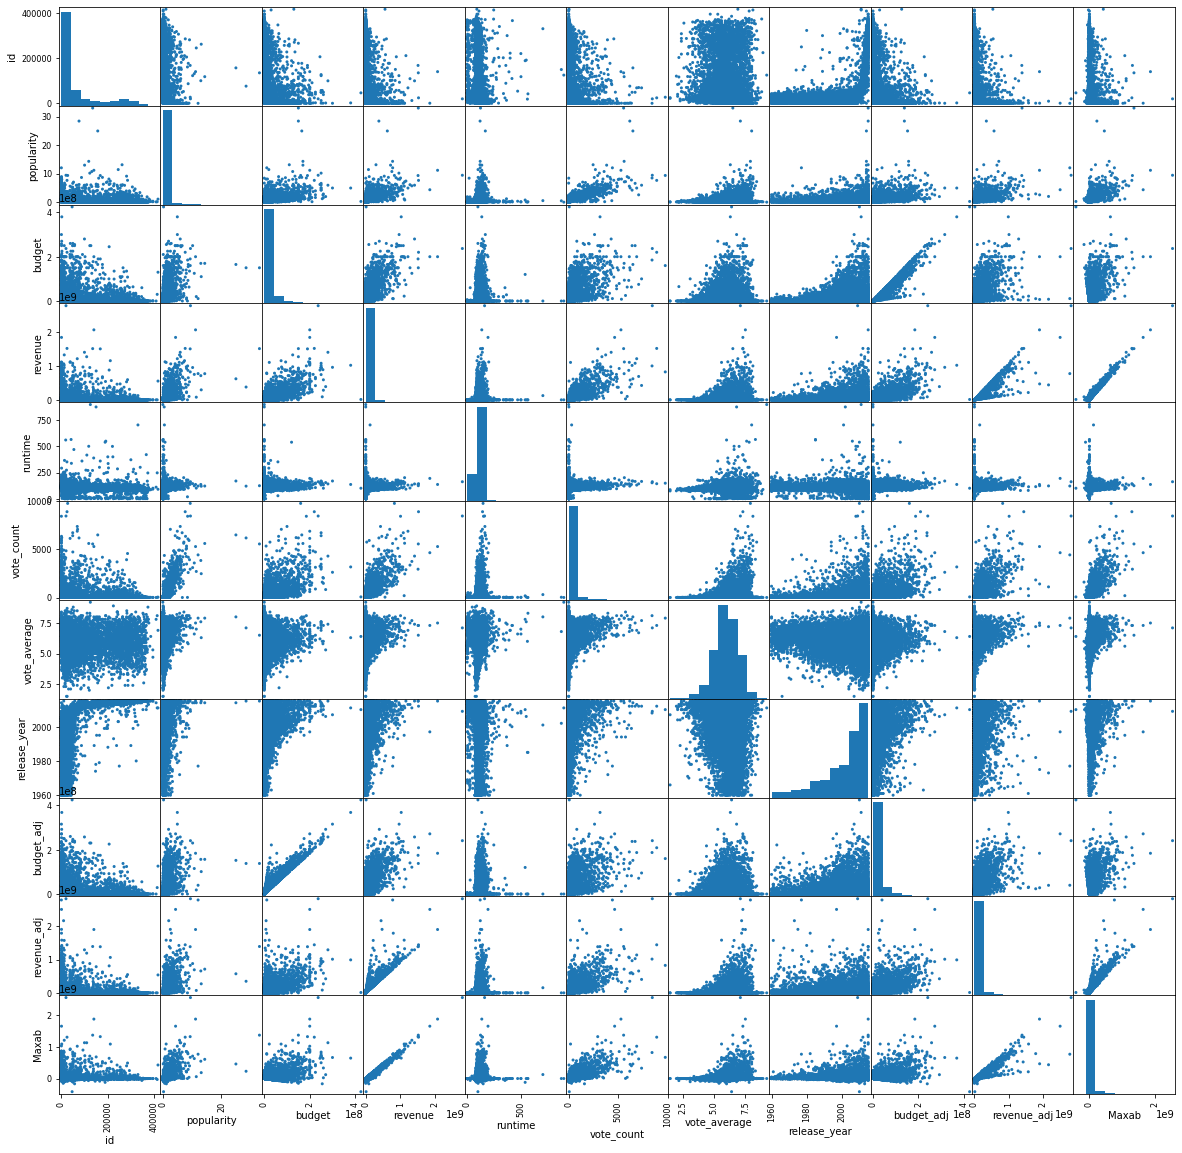

In [17]:
# all relations with one column and another
pd.plotting.scatter_matrix(df, alpha=1,figsize=(20,20), grid=True);

In [18]:
# change data type to string 
df["genres"] = df["genres"].astype(str)

In [19]:
def split(x):
# concatenate all the rows of the genrs.
    genre_df = df[x].str.cat(sep = "|") # creating a series for the genres
    split = pd.Series(genre_df.split("|"))
# conts each of the genre and return.
    info = split.value_counts(ascending=False)
    return info

#### That function which has been created splitted array into
- categories then count them depend on thier value

In [20]:

df["genres"] = df["genres"].astype(str)
movies_genres = split('genres')
print(movies_genres)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
nan                  23
dtype: int64


- I 've selected genres because its my main question and I 'm trying to get the answer


Text(0, 0.5, 'Genres')

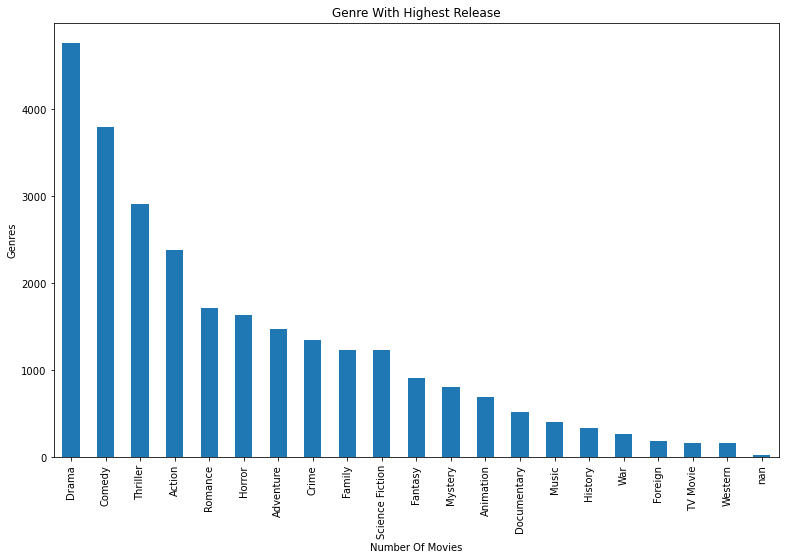

In [21]:
movies_genres.plot(kind = 'bar', figsize = (13,8))
plt.title("Genre With Highest Release")
plt.xlabel('Number Of Movies')
plt.ylabel("Genres")

# Drama is a high value 

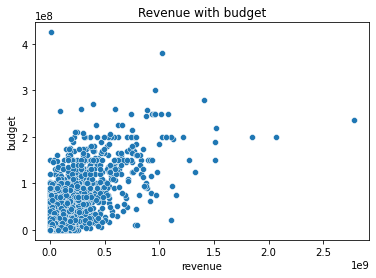

In [25]:
# make chart by seaborn library _x reprsnt "revenue" and y  reprsnt "Maxab"
sns.scatterplot(x='revenue',y='budget',data =df)
plt.title("Revenue with budget")
plt.ylabel("budget");

- This figure shows incresing budget high correlated to revenue .73 

In [23]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Maxab
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487,-0.074975
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085,0.628997
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531,0.570222
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109,0.976162
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668,0.136022
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941,0.755908
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062,0.183067
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236,0.032038
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627,0.545654
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000,0.914145


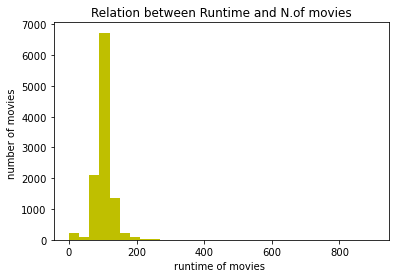

In [31]:
plt.title("Relation between Runtime and N.of movies")
plt.xlabel("runtime of movies ")
plt.ylabel("number of movies ")
plt.hist(df["runtime"],bins= 30,color="y" )
plt.show()

- this figure shows that average run time of movie between 50 - 200 mins
- 100 mins has the highest value which is mode 

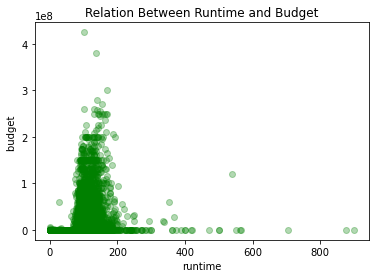

In [34]:
plt.title("Relation Between Runtime and Budget")
plt.xlabel("runtime")
plt.ylabel("budget ")
plt.scatter(df["runtime"],df["budget"], alpha=0.3,color = "g")
plt.show()

- This figure shows runtime and budget 100- 150 mins shows the highest value 

In [35]:
# this code splitting the column into its values and count them after
cast_count = pd.Series(df['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(20)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
John Goodman          49
Morgan Freeman        49
Liam Neeson           48
Susan Sarandon        48
Julianne Moore        47
Alec Baldwin          47
Tom Hanks             46
Gene Hackman          46
Johnny Depp           46
Christopher Walken    46
Dennis Quaid          45
Sylvester Stallone    45
Willem Dafoe          45
dtype: int64

### Robert de Niro top one

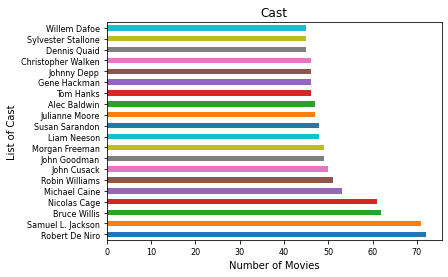

In [36]:
#for the color variety
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
# Initialize the plot
diagram = cast_count.head(20).plot.barh(fontsize = 8,color=colors)
# Set a title
diagram.set(title = 'Cast')
# x-label and y-label
diagram.set_xlabel('Number of Movies')
diagram.set_ylabel('List of Cast')
# Show the plot
plt.show()

- Robert de Niro participate at 72 Movies

In [37]:
df100R=df.sort_values(by='vote_average',ascending=False) # sorting dataframe depened on vote average to get top 10
df100R=df100R[['original_title','vote_average']].head(100)
#dataframe that includes the top 100 movies
df100R.head(10)

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
1200,Black Mirror: White Christmas,8.8
2269,Life Cycles,8.8
6911,Pink Floyd: Pulse,8.7
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6
3690,The Art of Flight,8.5
8411,Queen - Rock Montreal,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
8839,Dave Chappelle: Killin' Them Softly,8.5


### what is the highest movie who has high rate ?

In [38]:
df100R.head(1)


,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2


- Story of film An Odyssesy

In [40]:
df100['budget'].mean()

14624286.06433502


## Conclusions



- In the cleaning section i start remove duplicates and null values , check the datatype and the messy values.
- In the data analysis section, the profit was calculated for each movie, and the most profit was 425,000,000
  Since the average profit is 25202610.01251726
  I also noticed that drama movies are the most popular, followed by comedies, while Nan movies are the least popular.
  The highest-grossing film is "Epic Storyline".
- I concluded from the analysis that if we spend more money to our movie we will get high profit.
- I advise to reduce the naan because the profit in it is little and it is considered less popular